# naive classifier 

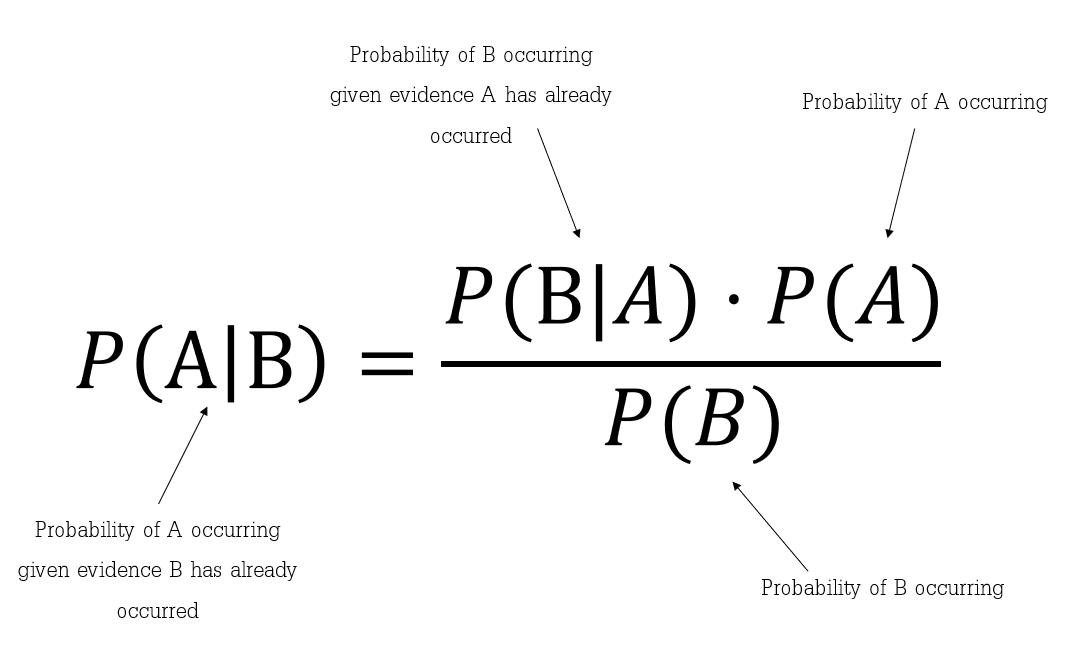

In [1]:
import warnings 
warnings.filterwarnings("ignore")

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import seaborn as sns
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
# if the features are continuos Gaussian is suitable
# if the features are catigorical then multinomial is suitable

# iris data

In [2]:
iris = sns.load_dataset("iris")

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<AxesSubplot:xlabel='species', ylabel='petal_length'>

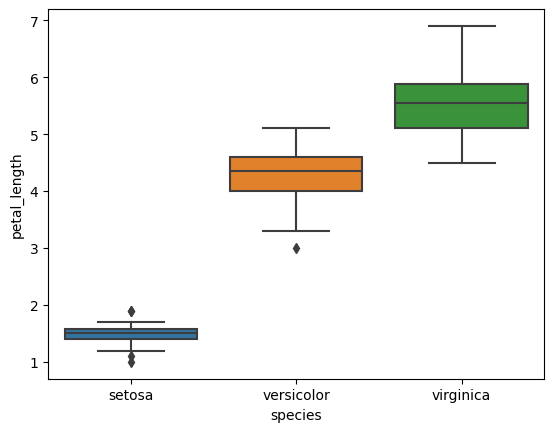

In [5]:
sns.boxplot(iris.species,iris.petal_length)

<AxesSubplot:xlabel='species', ylabel='petal_width'>

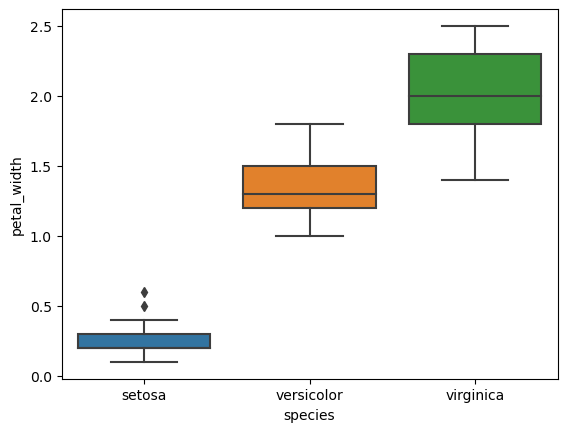

In [6]:
sns.boxplot(iris.species,iris.petal_width)

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

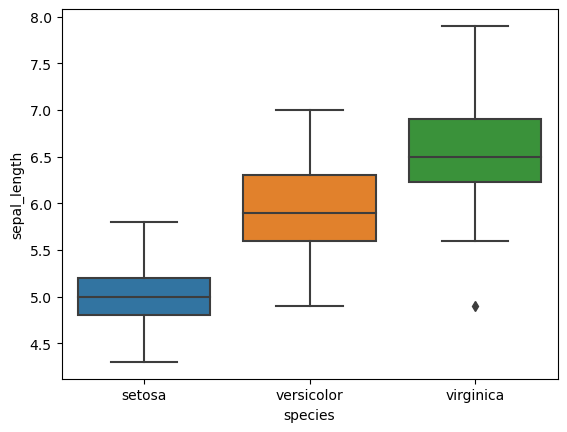

In [7]:
sns.boxplot(iris.species,iris.sepal_length)

<AxesSubplot:xlabel='species', ylabel='sepal_width'>

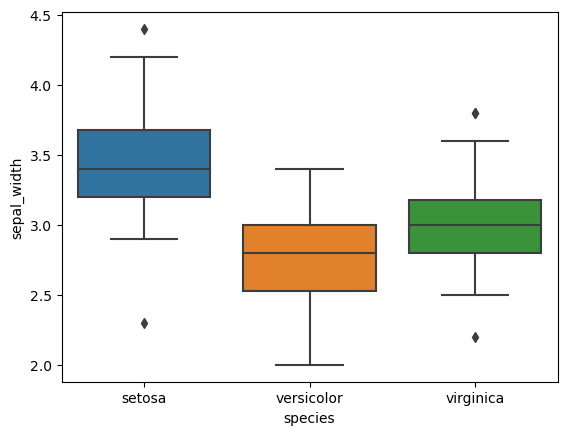

In [8]:
sns.boxplot(iris.species,iris.sepal_width) 

<AxesSubplot:xlabel='petal_width', ylabel='Density'>

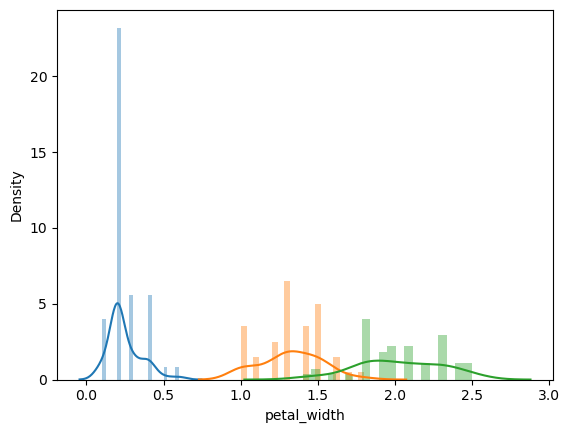

In [9]:
sns.distplot(iris[iris.species=="setosa"].iloc[:,3],norm_hist=True,bins=20)
sns.distplot(iris[iris.species=="versicolor"].iloc[:,3],norm_hist=True,bins=20)     
sns.distplot(iris[iris.species=="virginica"].iloc[:,3],norm_hist=True,bins=20)

<AxesSubplot:xlabel='petal_length', ylabel='Density'>

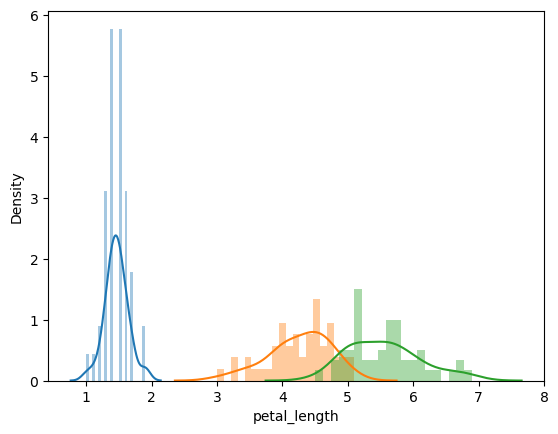

In [10]:
sns.distplot(iris[iris.species=="setosa"].iloc[:,2],norm_hist=True,bins=20)
sns.distplot(iris[iris.species=="versicolor"].iloc[:,2],norm_hist=True,bins=20)
sns.distplot(iris[iris.species=="virginica"].iloc[:,2],norm_hist=True,bins=20)

<AxesSubplot:xlabel='sepal_width', ylabel='Density'>

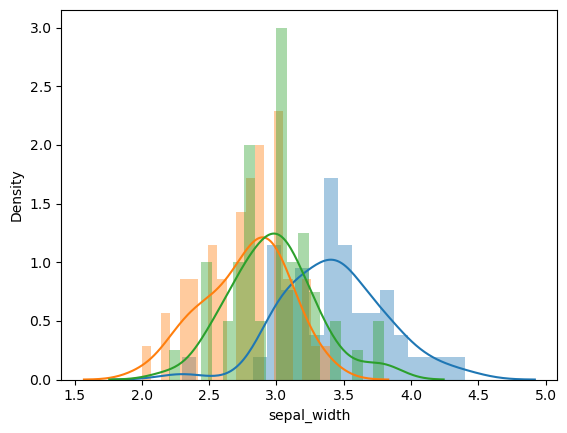

In [11]:
sns.distplot(iris[iris.species=="setosa"].iloc[:,1],norm_hist=True,bins=20)
sns.distplot(iris[iris.species=="versicolor"].iloc[:,1],norm_hist=True,bins=20)
sns.distplot(iris[iris.species=="virginica"].iloc[:,1],norm_hist=True,bins=20)

<AxesSubplot:xlabel='sepal_length', ylabel='Density'>

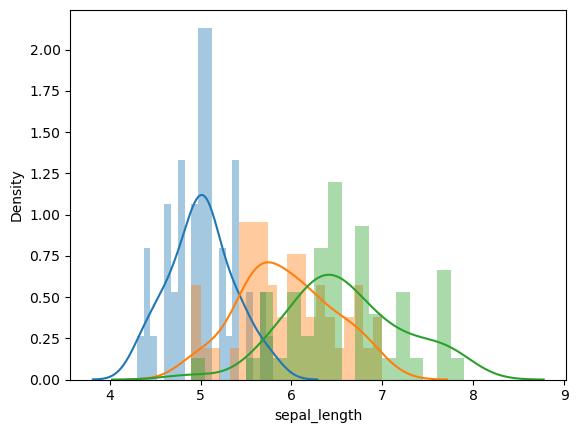

In [12]:
sns.distplot(iris[iris.species=="setosa"].iloc[:,0],norm_hist=True,bins=20)
sns.distplot(iris[iris.species=="versicolor"].iloc[:,0],norm_hist=True,bins=20)
sns.distplot(iris[iris.species=="virginica"].iloc[:,0],norm_hist=True,bins=20)

In [4]:
iris.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [7]:
X_train, X_test, y_train, y_test = train_test_split(iris.iloc[:,3:4],iris.iloc[:,-1] ,test_size=0.3,random_state=23)



In [8]:
model=GaussianNB()
model=model.fit(X_train,y_train)
# Gaussian distribution is a normal distribution


In [9]:
y_test_pred=model.predict(X_test)

In [10]:
metrics.accuracy_score(y_test,y_test_pred)
# petal width is best feature - 97%
#with all features  - 95%

0.9777777777777777

In [18]:
x_train,x_test,y_train,y_test=train_test_split(iris.iloc[:,0:4],iris.iloc[:,4],test_size=0.3,shuffle=True)

mu1=np.mean(x_train[y_train=="setosa"].petal_length)
sigma1=np.var(x_train[y_train=="setosa"].petal_length)

mu2=np.mean(x_train[y_train=="versicolor"].petal_length)
sigma2=np.var(x_train[y_train=="versicolor"].petal_length)

mu3=np.mean(x_train[y_train=="virginica"].petal_length)
sigma3=np.var(x_train[y_train=="virginica"].petal_length)

def dis(mu,x,sigma):
    return (np.exp(-(x-mu)**2)/(2*sigma))/(np.sqrt(sigma))
    
x_test["prob_class_1"]=x_test["petal_length"].apply(lambda x: dis(mu1,x,sigma1))
x_test["prob_class_2"]=x_test["petal_length"].apply(lambda x: dis(mu2,x,sigma2))
x_test["prob_class_3"]=x_test["petal_length"].apply(lambda x: dis(mu3,x,sigma3))
l=["setosa","versicolor","virginica"]
x_test["pred"]=np.argmax(x_test[["prob_class_1","prob_class_2","prob_class_3"]].values,axis=1)
x_test["pred"]=x_test["pred"].apply(lambda x: l[x])
x_test["true"]=y_test
# x_test.drop("col1",axis=1,inplace=True)
# x_test.drop("col2",axis=1,inplace=True)
# x_test.drop("col3",axis=1,inplace=True)

In [19]:
x_test

,sepal_length,sepal_width,petal_length,petal_width,prob_class_1,prob_class_2,prob_class_3,pred,true
58,6.6,2.9,4.6,1.3,6.053942e-03,6.138031,9.373192e-01,versicolor,versicolor
40,5.0,3.5,1.3,0.3,1.142003e+02,0.001226,2.335233e-08,setosa,setosa
62,6.0,2.2,4.0,1.0,1.832240e-01,6.591322,1.963268e-01,versicolor,versicolor
123,6.3,2.7,4.9,1.8,8.400529e-04,4.521659,1.563443e+00,versicolor,virginica
112,6.8,3.0,5.5,2.1,9.425934e-06,1.429935,2.534847e+00,virginica,virginica
52,6.9,3.1,4.9,1.5,8.400529e-04,4.521659,1.563443e+00,versicolor,versicolor
55,5.7,2.8,4.5,1.3,1.123510e-02,6.529817,7.593656e-01,versicolor,versicolor
44,5.1,3.8,1.9,0.4,9.634681e+01,0.029163,2.846769e-06,setosa,setosa
92,5.8,2.6,4.0,1.2,1.832240e-01,6.591322,1.963268e-01,versicolor,versicolor
48,5.3,3.7,1.5,0.2,1.168963e+02,0.003821,1.254337e-07,setosa,setosa
